In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
# Import the performance NBA data
performance_df = pd.read_excel("NBA stats.xlsx", sheetname="Player performance")
performance_df.head()

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,4.6,5.4,6.7,3.3,2.1,0.2,2.0,15,2,30.1
1,James Harden,Houston Rockets,26,82,41,41,38.1,8.7,19.7,43.9,...,5.3,6.1,7.5,4.6,1.7,0.6,2.8,23,3,29.0
2,Kevin Durant,Oklahoma City Thunder,27,72,52,20,35.8,9.7,19.2,50.5,...,7.6,8.2,5.0,3.5,1.0,1.2,1.9,27,1,28.2
3,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,9.1,11.5,3.3,3.8,1.6,1.4,3.6,47,1,26.9
4,LeBron James,Cleveland Cavaliers,31,76,56,20,35.6,9.7,18.6,52.0,...,6.0,7.4,6.8,3.3,1.4,0.6,1.9,28,3,25.3


In [3]:
# Import the salary data
salary_df = pd.read_excel("NBA stats.xlsx", sheetname="2016-2017 Salaries")
salary_df.head()

,RK,NAME,POS,TEAM,SALARY
0,1,Mike Conley,PG,Memphis Grizzlies,26540100
1,2,Al Horford,C,Boston Celtics,26540100
2,3,Carmelo Anthony,SF,New York Knicks,24559380
3,4,Damian Lillard,PG,Portland Trail Blazers,24328425
4,5,Chris Bosh,PF,Miami Heat,23741060


In [4]:
# Merge the two together
df = performance_df.merge(salary_df, left_on='Player', right_on='NAME')
df.head()

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,0.2,2.0,15,2,30.1,68,Stephen Curry,PG,Golden State Warriors,12112359
1,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,1.4,3.6,47,1,26.9,35,DeMarcus Cousins,C,Sacramento Kings,16957900
2,Damian Lillard,Portland Trail Blazers,25,75,40,35,35.7,8.2,19.7,41.9,...,0.4,2.2,15,0,25.1,4,Damian Lillard,PG,Portland Trail Blazers,24328425
3,Anthony Davis,New Orleans Pelicans,23,61,24,37,35.5,9.2,18.6,49.3,...,2.0,2.4,36,0,24.3,11,Anthony Davis,PF,New Orleans Pelicans,22116750
4,Russell Westbrook,Oklahoma City Thunder,27,80,55,25,34.4,8.2,18.1,45.4,...,0.3,2.5,54,18,23.5,24,Russell Westbrook,PG,Oklahoma City Thunder,17769374


### PART TWO ###

Using the NBA data, make a chart that highlights two specific players that make either a lot or a little money vs. how well they perform. Add their names and a little information about them to the chart. Play around with fonts and colors, make that chart look great!

In [5]:
df.sort_values('SALARY',ascending=False).head(1)


,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
45,Mike Conley,Memphis Grizzlies,28,56,33,23,31.4,5.3,12.4,42.2,...,0.3,1.8,4,0,15.3,1,Mike Conley,PG,Memphis Grizzlies,26540100


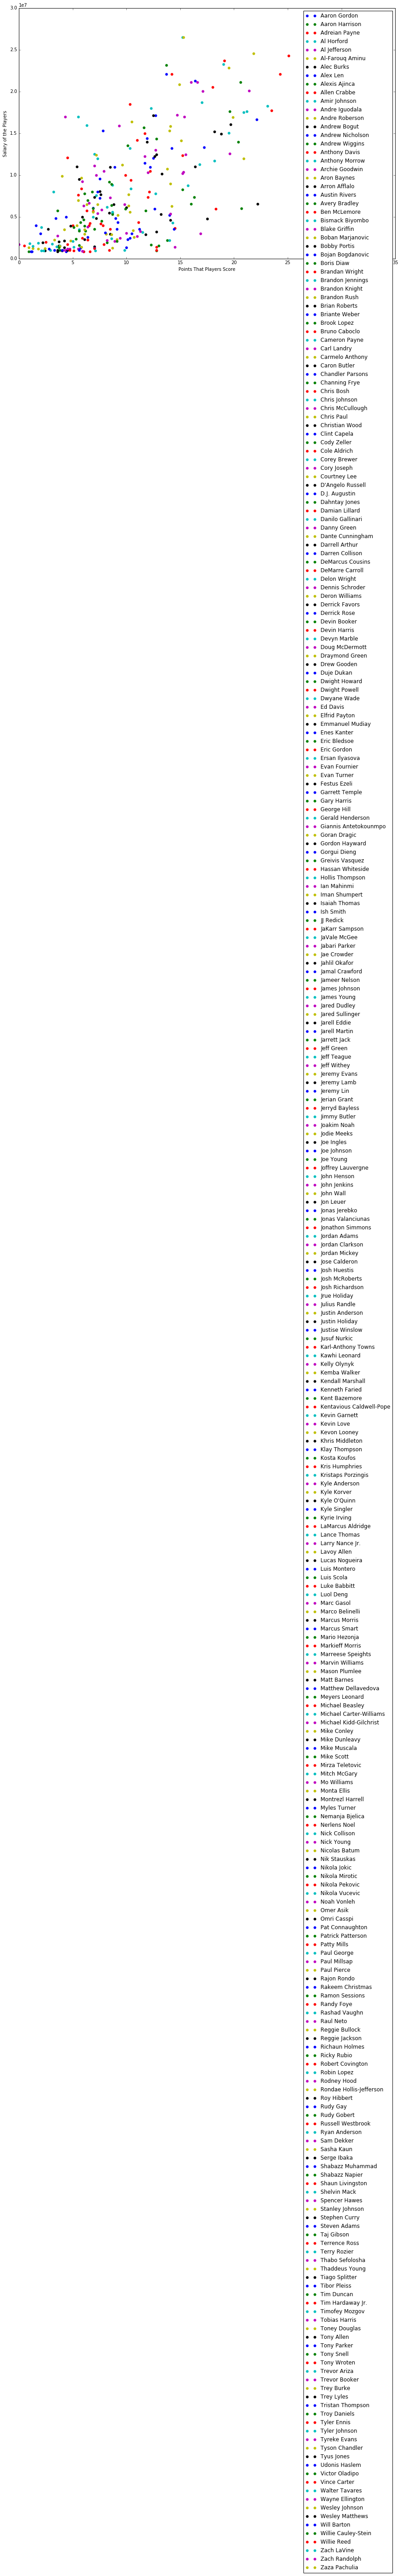

In [6]:
#grouping by team
fig, ax = plt.subplots(figsize=(15,10))
for category, group in df.groupby('NAME'):
    
    ax.plot(group['PTS'], group['SALARY'], marker='o', linestyle='', markeredgewidth=0, label=category)
ax.set_xlim([0, 35])
ax.set_ylim([0, 30000000])
ax.legend()
ax.set_xlabel('Points That Players Score')
ax.set_ylabel('Salary of the Players')
plt.savefig("nba-pointvs-sal.pdf", transparent=True)

To pick up the player who is making way less than his peers though he is scoring high, and the one who is making way more though scoring less, I am going to chart table.

In [7]:
#makes lots of money though scores less
highsal_lowscore = df[(df['SALARY'] > 15000000) & (df['PTS'] < 6)].tail(1)
highsal_lowscore

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
253,Joakim Noah,Chicago Bulls,31,29,15,14,21.9,1.8,4.6,38.3,...,1.0,2.7,1,0,4.3,33,Joakim Noah,C,New York Knicks,17000000


In [8]:
# makes less salary though scores high
lowsal_highscore=df[(df['SALARY'] < 7000000) & (df['PTS'] > 22)].head(1)
lowsal_highscore

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
6,Isaiah Thomas,Boston Celtics,27,82,48,34,32.2,7.2,16.9,42.8,...,0.1,2.0,7,0,22.2,128,Isaiah Thomas,PG,Boston Celtics,6587132


In [9]:
#concat two frames
frames = [lowsal_highscore,highsal_lowscore]
df_plot = pd.concat(frames)
df_plot

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
6,Isaiah Thomas,Boston Celtics,27,82,48,34,32.2,7.2,16.9,42.8,...,0.1,2.0,7,0,22.2,128,Isaiah Thomas,PG,Boston Celtics,6587132
253,Joakim Noah,Chicago Bulls,31,29,15,14,21.9,1.8,4.6,38.3,...,1.0,2.7,1,0,4.3,33,Joakim Noah,C,New York Knicks,17000000


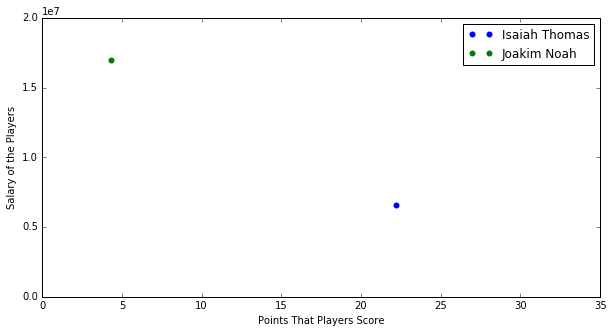

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
for category, group in df_plot.groupby('NAME'):
    
    ax.plot(group['PTS'], group['SALARY'], marker='o', linestyle='', markeredgewidth=0, label=category)
ax.set_xlim([0, 35])
ax.set_ylim([0, 20000000])
ax.legend()
ax.set_xlabel('Points That Players Score')
ax.set_ylabel('Salary of the Players')
plt.savefig("name-pointvs-sal.pdf", transparent=True)

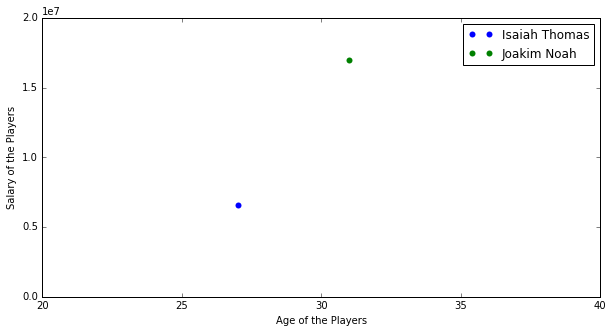

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
for category, group in df_plot.groupby('NAME'):
    
    ax.plot(group['AGE'], group['SALARY'], marker='o', linestyle='', markeredgewidth=0, label=category)
ax.set_xlim([20, 40])
ax.set_ylim([0, 20000000])
ax.legend()
ax.set_xlabel('Age of the Players')
ax.set_ylabel('Salary of the Players')
plt.savefig("name-pointvs-sal.pdf", transparent=True)

### PART THREE ###

Using the scrabble data, reproduce the "Nigel Richards's Performance at Nationals" chart from FiveThirtyEight (minus the UFO bits). Build the basic chart from this dataframe:

http://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/

points_df  = pd.read_csv("scrabble-point-spread.csv")
tournament_df = pd.read_csv("scrabble-tournament.csv")
df = tournament_df.merge(points_df, left_on='Player ID', right_on='player_id').fillna(0)
df.head()

Hot tip: You might want to start with matplotlib using the fivethirtyeight style. Check this blog post for info on how to make arrows. https://luanneseymour.wordpress.com/2012/10/30/creating-arrows-and-arrowheads-in-illustrator-cs6/

In [12]:
points_df  = pd.read_csv("scrabble-point-spread.csv")
tournament_df = pd.read_csv("scrabble-tournament.csv")
df = tournament_df.merge(points_df, left_on='Player ID', right_on='player_id').fillna(0)
df.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,...,Seed,Spread,Ties,Tournament ID,Wins,division,player_id,points_against,points_for,tournament_id
0,0.0,0.0,7,Nigel Richards,2196,2168.0,0,2356.0,1,6003,...,1,1934,0.0,8163,24,Division 1,6003,381,443,8163
1,0.0,0.0,7,Komol Panyasophonlert,2070,2002.0,0,2372.0,2,20749,...,11,1868,0.0,8163,24,Division 1,20749,375,435,8163
2,0.0,0.0,8,Will Anderson,2093,2054.0,0,2264.0,3,19535,...,2,1623,0.0,8163,23,Division 1,19535,391,443,8163
3,0.0,0.0,9,Noah Walton,2063,2015.0,0,2239.0,4,18474,...,8,1628,0.0,8163,22,Division 1,18474,386,439,8163
4,0.0,0.0,10,Kenji Matsumoto,2057,2023.0,0,2212.0,5,583,...,5,1671,0.0,8163,21,Division 1,583,396,450,8163


In [13]:
df_fifty = df.head(50)

In [14]:
len(df) / 4 
# to make four divisions.

120.25

In [15]:
df.columns

Index(['Byes', 'Credits', 'Losses', 'Name', 'New Rating', 'Old Rating',
       'Other Money', 'Perf Rating', 'Place', 'Player ID', 'Prize Money',
       'Seed', 'Spread', 'Ties', 'Tournament ID', 'Wins', 'division',
       'player_id', 'points_against', 'points_for', 'tournament_id'],
      dtype='object')

In [16]:
div1 = df[df['division']== 'Division 1']
div2 = df[df['division']== 'Division 2']
div3 = df[df['division']== 'Division 3']
div4 = df[df['division']== 'Division 4']

In [17]:

div1['points_for'].mean()

401.74400000000003

In [18]:
div1['points_against'].mean()

401.91199999999998

In [19]:
div2['points_for'].mean()

385.08130081300811

In [20]:
div2['points_against'].mean()

385.27642276422762

In [21]:
div3['points_for'].mean()

371.48550724637681

In [22]:
div3['points_against'].mean()

371.50724637681162

In [25]:
div4['points_for'].mean()

353.06315789473683

In [26]:
div4['points_against'].mean()

353.25263157894739

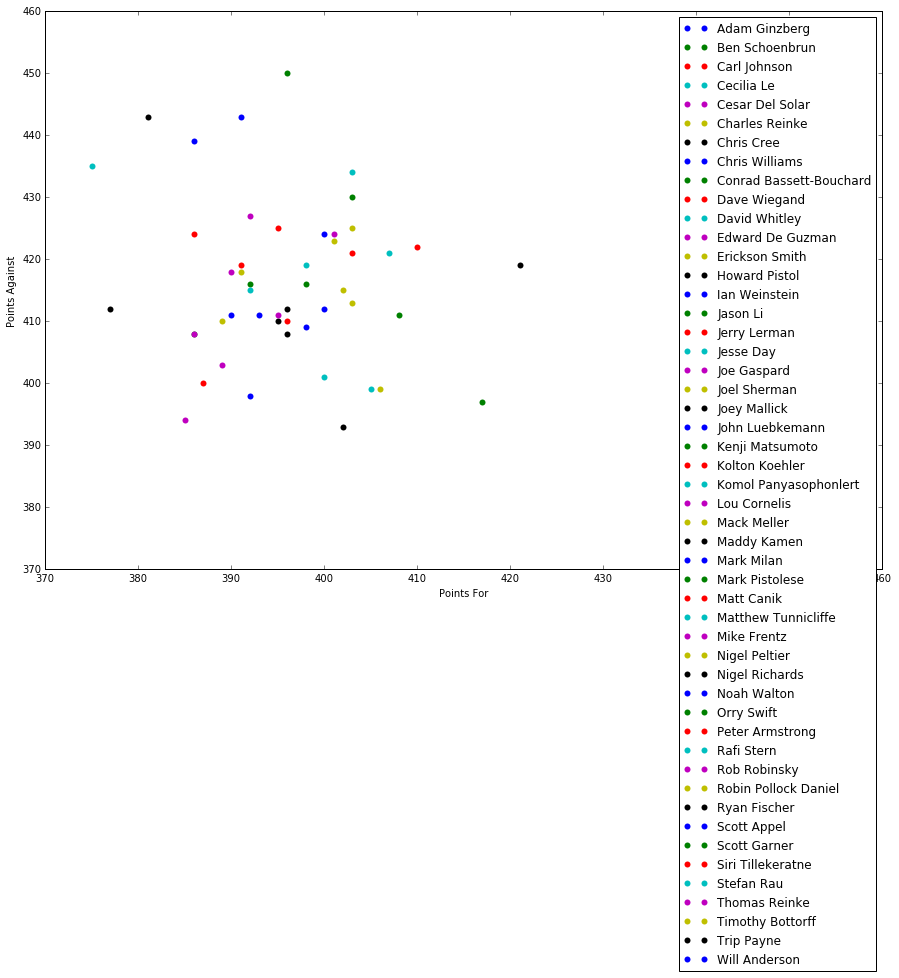

In [23]:
# Lifetime average of top 50 players against Nigel Richards
fig, ax = plt.subplots(figsize=(15,10))
for category, group in df_fifty.groupby('Name'):
    
    ax.plot(group['points_against'], group['points_for'], marker='o', linestyle='', markeredgewidth=0, label=category)
ax.set_xlim([370, 460])
ax.set_ylim([370, 460])
ax.legend()
ax.set_label("Nigel Richards Is In His Own League")
ax.set_xlabel('Points For')
ax.set_ylabel('Points Against')
plt.savefig("scrabble-simple.pdf", transparent=True)

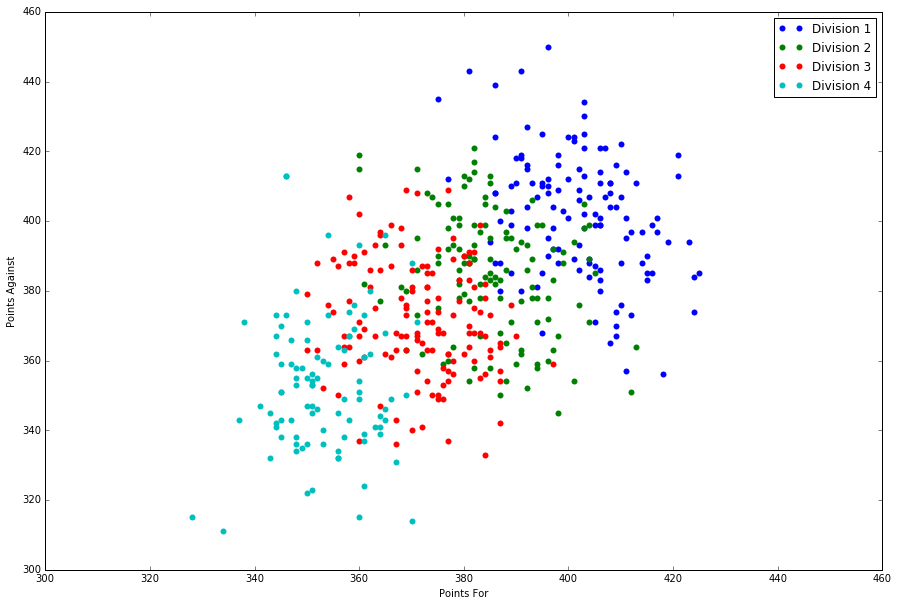

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
for category, group in df.groupby('division'):
    with plt.style.context('fivethirtyeight'):
    
        ax.plot(group['points_against'], group['points_for'],marker='o', linestyle='', markeredgewidth=0, label=category)
        
ax.set_xlim([300, 460])
ax.set_ylim([300, 460])
ax.legend()
ax.set_label("Nigel Richards At Nationals")
ax.set_xlabel('Points For')
ax.set_ylabel('Points Against')
plt.savefig("scrabble-comp.pdf", transparent=True)